1 Часть

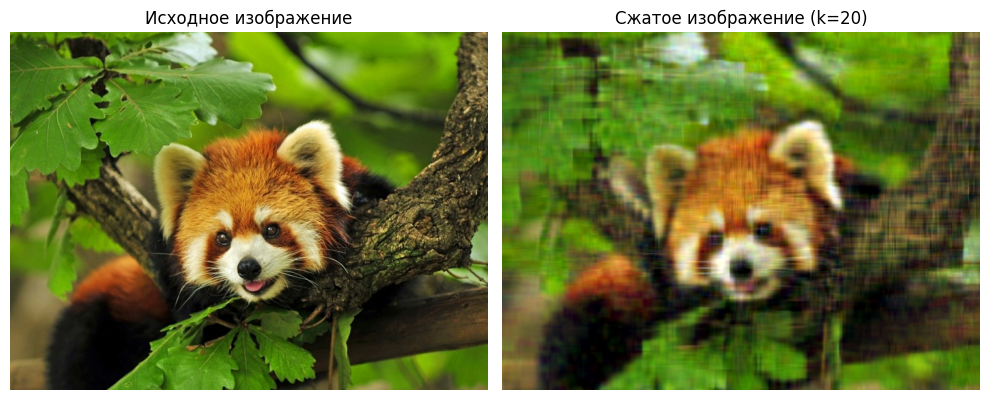

(525, 525) (525,) (525, 700)


In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('panda.jpg')
w, h = img.size
x = np.array(img, dtype=np.float64)
img1, img2, img3 = np.split(x, 3, axis=2)
img1 = np.squeeze(img1)
img2 = np.squeeze(img2)
img3 = np.squeeze(img3)

k = 20

U, S, V = np.linalg.svd(img1, full_matrices=False)

U_k = U[:, :k]
S_k = S[:k]
Vt_k = V[:k, :]


U_2, S_2, V_2 = np.linalg.svd(img2, full_matrices=False)

U_k_2 = U_2[:, :k]
S_k_2 = S_2[:k]
Vt_k_2 = V_2[:k, :]


U_3, S_3, V_3 = np.linalg.svd(img3, full_matrices=False)

U_k_3 = U_3[:, :k]
S_k_3 = S_3[:k]
Vt_k_3 = V_3[:k, :]

compressed_img1 = U_k @ np.diag(S_k) @ Vt_k
compressed_img2 = U_k_2 @ np.diag(S_k_2) @ Vt_k_2
compressed_img3 = U_k_3 @ np.diag(S_k_3) @ Vt_k_3

compressed_img = [compressed_img1, compressed_img2, compressed_img3]
compressed_array = np.stack(compressed_img, axis=-1)
compressed_array = np.clip(compressed_array, 0, 255).astype(np.uint8)

Image.fromarray(compressed_array).save(f"{k}.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

    # Отображение сжатого изображения
axes[1].imshow(compressed_array)
axes[1].set_title(f'Сжатое изображение (k={k})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(U.shape, S.shape, V.shape)

2 Часть

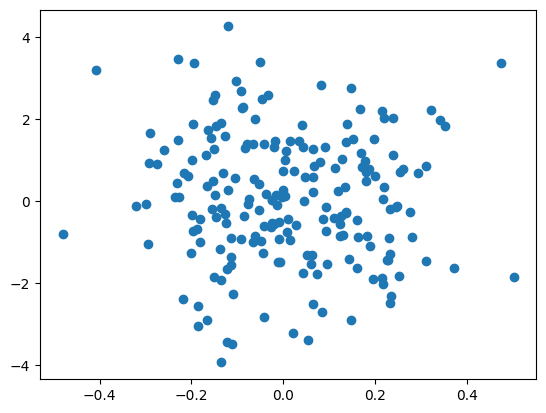

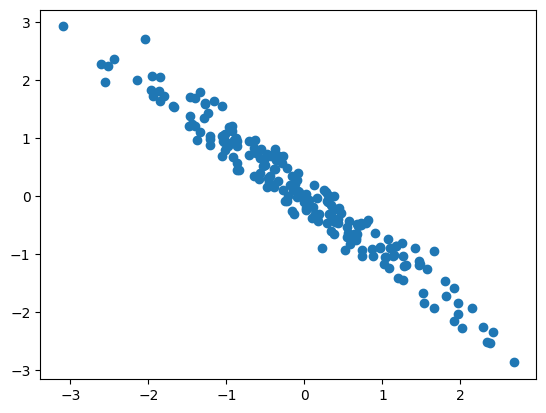

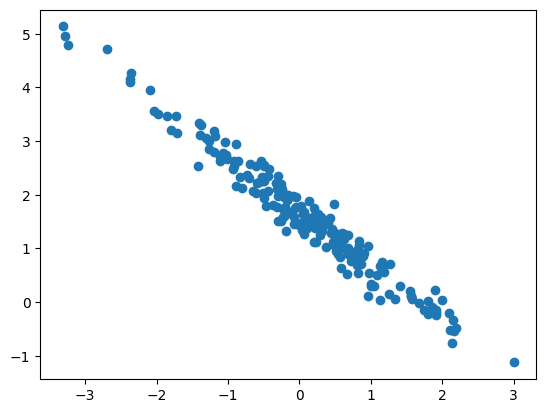

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

M = 200
sigma1 = 0.2
sigma2 = 1.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
def r(a): return np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])


plt.scatter(x1, x2)
plt.show()


n = (r(np.pi / 4) @ X.T).T
plt.scatter(n[:,0], n[:,1])
plt.show()


c = np.cov(n.T)
d = np.random.multivariate_normal([0.2, 1.5], c, 200)
plt.scatter(d[:,0], d[:,1])
plt.show()

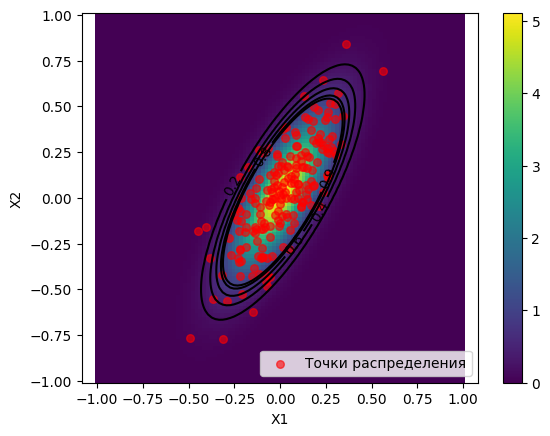

In [41]:
from scipy.stats import multivariate_normal

M = 200
sigma1 = 0.3
sigma2 = 0.1


x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2


X = np.concatenate((x1, x2), axis=1)

alpha = np.pi/3
R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha),  np.cos(alpha)]])
X_rot = X @ R.T

mu = np.mean(X_rot, axis=0)
C = np.cov(X_rot.T)


xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mu, C)
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)


plt.scatter(X_rot[:,0], X_rot[:,1], c='red', s=30, alpha=0.6, label='Точки распределения')


plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()




/tmp/ipython-input-3151474630.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X0 = np.random.multivariate_normal(cl1_true, C0_true, M)
/tmp/ipython-input-3151474630.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(cl2_true, C1_true, M)


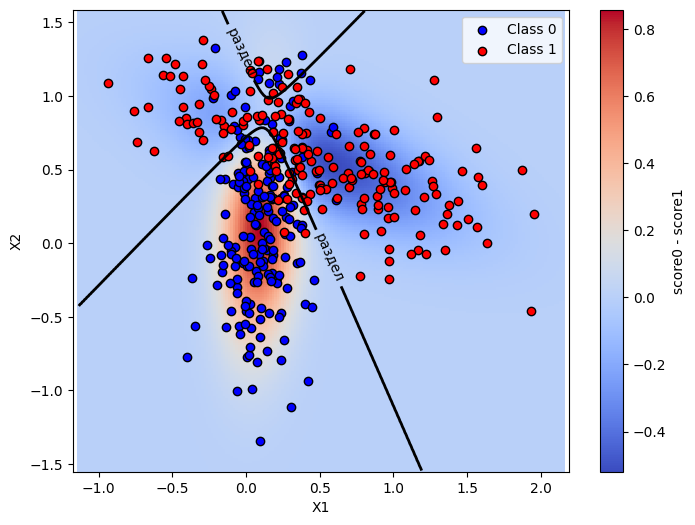

In [42]:
M = 200

cl1_true = [0.1, 0.2]
C0_true = [[0.03, 0.01], [0.02, 0.3]]
X0 = np.random.multivariate_normal(cl1_true, C0_true, M)
y0 = np.zeros(M)


cl2_true = [0.5, 0.6]
C1_true = [[0.08, 0.02], [-0.3, 0.15]]
X1 = np.random.multivariate_normal(cl2_true, C1_true, M)
y1 = np.ones(M)

X = np.vstack((X0, X1))
y = np.concatenate((y0, y1))


mu0 = np.mean(X[y==0], axis=0)
mu1 = np.mean(X[y==1], axis=0)
C0 = np.cov(X[y==0].T)
C1 = np.cov(X[y==1].T)


p0 = np.mean(y==0)
p1 = np.mean(y==1)


xx = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 200)
yy = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.stack((XX.flatten(), YY.flatten()), axis=1)

rv0 = multivariate_normal(mean=mu0, cov=C0)
rv1 = multivariate_normal(mean=mu1, cov=C1)

score0 = rv0.pdf(points) * p0
score1 = rv1.pdf(points) * p1


Z = (score0 - score1).reshape(XX.shape)


plt.figure(figsize=(8,6))


plt.pcolor(XX, YY, Z, shading='auto', cmap='coolwarm')
plt.colorbar(label='score0 - score1')


CS = plt.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
plt.clabel(CS, fmt='раздел', fontsize=10)


plt.scatter(X0[:,0], X0[:,1], c='blue', edgecolor='k', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', edgecolor='k', label='Class 1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()

In [43]:
from sklearn.base import BaseEstimator
class myLDA(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
      self.p0 = np.mean(y == 0)
      self.p1 = np.mean(y == 1)

      self.mu0 = np.mean(X[y==0], axis=0)
      self.mu1 = np.mean(X[y==1], axis=0)

      X0_centred = X[y==0] - self.mu0
      X1_centred = X[y==1] - self.mu1

      C = (X0_centred.T@X0_centred + X1_centred.T@X1_centred)/(len(X)-2)
      self.C_inv = np.linalg.inv(C)

      self.w = self.C_inv @ (self.mu0 - self.mu1)
      self.b = -0.5 * (self.mu0 @ self.C_inv @ self.mu0 - self.mu1 @ self.C_inv @ self.mu1) + np.log(self.p0/self.p1)



    def predict(self, X):
      scores = X @ self.w + self.b
      return (scores < 0).astype(int)

/tmp/ipython-input-3129980199.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X0 = np.random.multivariate_normal([0,0], [[-1,1],[-3,0.5]], M)
/tmp/ipython-input-3129980199.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal([1,1], [[-1,1],[-3,0.5]], M)


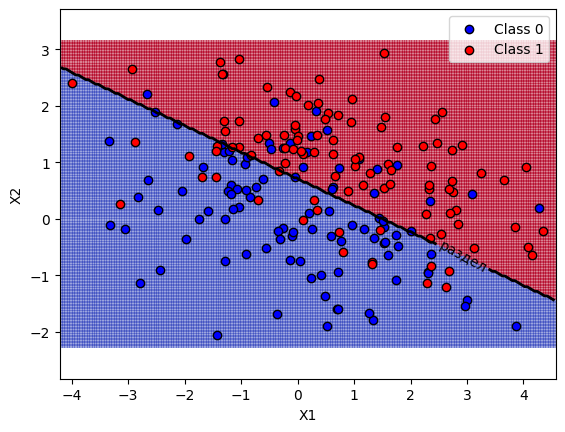

In [49]:
M = 100
X0 = np.random.multivariate_normal([0,0], [[-1,1],[-3,0.5]], M)
X1 = np.random.multivariate_normal([1,1], [[-1,1],[-3,0.5]], M)
X = np.vstack((X0, X1))
y = np.concatenate((np.zeros(M), np.ones(M)))

lda = myLDA()
lda.fit(X, y)

xx = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 200)
yy = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.c_[XX.ravel(), YY.ravel()]

Z = lda.predict(points).reshape(XX.shape)



plt.pcolor(XX, YY, Z, cmap='coolwarm', alpha=0.5)
CS = plt.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
plt.clabel(CS, fmt='раздел', fontsize=10)

plt.scatter(X0[:,0], X0[:,1], c='blue', edgecolor='k', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', edgecolor='k', label='Class 1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()

In [45]:
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.classes = None
        self.means = {}
        self.vars = {}
        self.p_y = {}
        self.log_p_y = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            self.p_y[c] = np.mean(y == c)
            self.means[c] = np.mean(X_c, axis=0)
            self.vars[c] = np.var(X_c, axis=0)
            self.log_p_y[c] = np.log(self.p_y[c])

    def predict_line(self, X):

        probs = []
        for x in X:
            scores = []
            for c in self.classes:
                part1 = -0.5 * np.sum(np.log(2 * np.pi * self.vars[c]))
                part2 = -0.5 * np.sum((x - self.means[c])**2 / self.vars[c])
                part3 = part1 + part2 + self.log_p_y[c]
                scores.append(part3)
            probs.append(scores)
        return np.array(probs)

    def predict(self, X):
        scores = self.predict_line(X)
        return np.argmax(scores, axis=1)



/tmp/ipython-input-983582385.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X0 = np.random.multivariate_normal([0,0], [[-1,1],[-3,0.5]], M)
/tmp/ipython-input-983582385.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal([1,1], [[-1,1],[-3,0.5]], M)


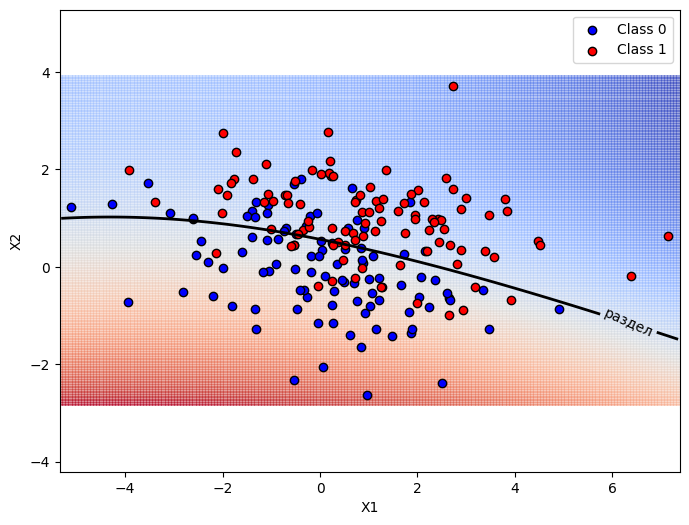

In [51]:
M = 100
X0 = np.random.multivariate_normal([0,0], [[-1,1],[-3,0.5]], M)
X1 = np.random.multivariate_normal([1,1], [[-1,1],[-3,0.5]], M)
X = np.vstack((X0, X1))
y = np.concatenate((np.zeros(M), np.ones(M)))

nb = myNB()
nb.fit(X, y)

xx = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 200)
yy = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.c_[XX.ravel(), YY.ravel()]

Z = nb.predict_line(points)
Z = (Z[:,0] - Z[:,1]).reshape(XX.shape)

plt.figure(figsize=(8,6))
plt.pcolor(XX, YY, Z, cmap='coolwarm', alpha=0.5)
CS = plt.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
plt.clabel(CS, fmt='раздел', fontsize=10)

plt.scatter(X0[:,0], X0[:,1], c='blue', edgecolor='k', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', edgecolor='k', label='Class 1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()

In [52]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)


print("NB:", accuracy_score(y_test, y_pred_nb),
      precision_score(y_test, y_pred_nb),
      recall_score(y_test, y_pred_nb))

print("LDA:", accuracy_score(y_test, y_pred_lda),
      precision_score(y_test, y_pred_lda),
      recall_score(y_test, y_pred_lda))

NB: 0.86 0.8461538461538461 0.88
LDA: 0.86 0.875 0.84
